In [10]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys

import seaborn as sns
sns.set()

DATA_DIR = Path('./data')
REAL_DATA = Path(DATA_DIR / 'MULTI_VP_profiles/')
PROC_DIR = Path(DATA_DIR / 'processed')


In [11]:
real_files = [f for f in PROC_DIR.iterdir()]
len(real_files)

11771

In [12]:
# data_dirs = [d for d in REAL_DATA.iterdir() if d.is_dir()]
# # real_files

# for d in data_dirs:
#     for f in d.iterdir():
#         df = pd.read_csv(f, skiprows=2, sep=',')
        
#         flag = 0
#         if not(df.isnull().values.any()):
#             for j in df.columns:
#                 if(df[j].dtype != np.int64 and df[j].dtype != np.float64 ): #verifying if there's no weird data. if there is, skip
#                     flag = 1
#                     break
#         else: 
#             flag = 1
            
#         if flag: 
#             print(f)
#             continue
        
#         with open(f, 'r') as tmp:
#             lines = tmp.readlines()

#             values = lines[2].replace('#', '').split(',')

#             values = [v.strip() for v in values]

#             lines[2] = ','.join(values) + '\n'

#             with open(f"{PROC_DIR / f.stem}.csv" , 'w') as out:
#                 out.writelines(lines)
                
# len([f for f in PROC_DIR.iterdir()])
#         # print(lines[2])

In [13]:
def plot_file_data(paths : list, columns : list = ['R [Rsun]', 'B [G]', 'alpha [deg]'], num_rows : int = 640):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

    fig.set_figheight(10)
    fig.set_figwidth(10)
    x_values = [x for x in range(num_rows)]

    ax1.set(xlabel ='idx', ylabel = columns[0])
    ax2.set(xlabel ='idx', ylabel = columns[1])
    ax3.set(xlabel ='idx', ylabel = columns[2])

    flag = False
    for path in paths:
        df = pd.read_csv(str(path),  skiprows=2, usecols=columns)
        for j in df.columns:
            if(df[j].dtype != np.int64 and df[j].dtype != np.float64 ): #verifying if there's no weird data. if there is, skip
                flag = True
            break

        if (flag):
            continue
        ax1.plot(x_values, df[columns[0]],  linewidth=0.5)
        ax2.plot(x_values, df[columns[1]],  linewidth=0.5)
        ax3.plot(x_values, df[columns[2]],  linewidth=0.5)
        
        ax1.set_yscale('log')
        ax2.set_yscale('log')
        ax3.set_yscale('log')
        
    plt.show()

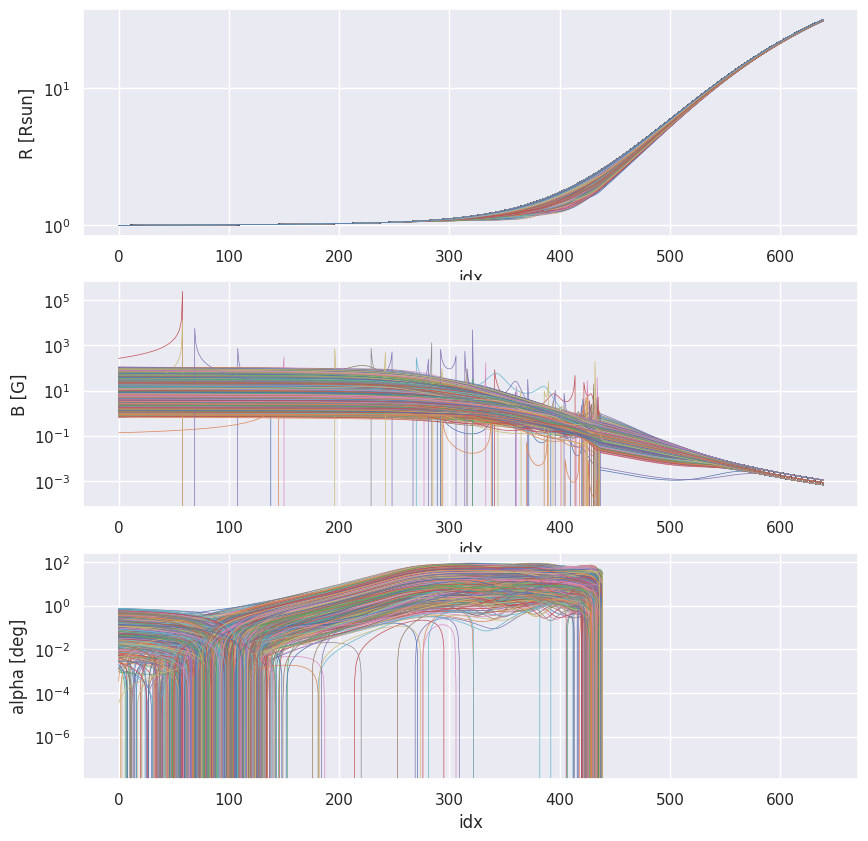

In [14]:
plot_file_data(real_files, ['R [Rsun]', 'B [G]', 'alpha [deg]'])


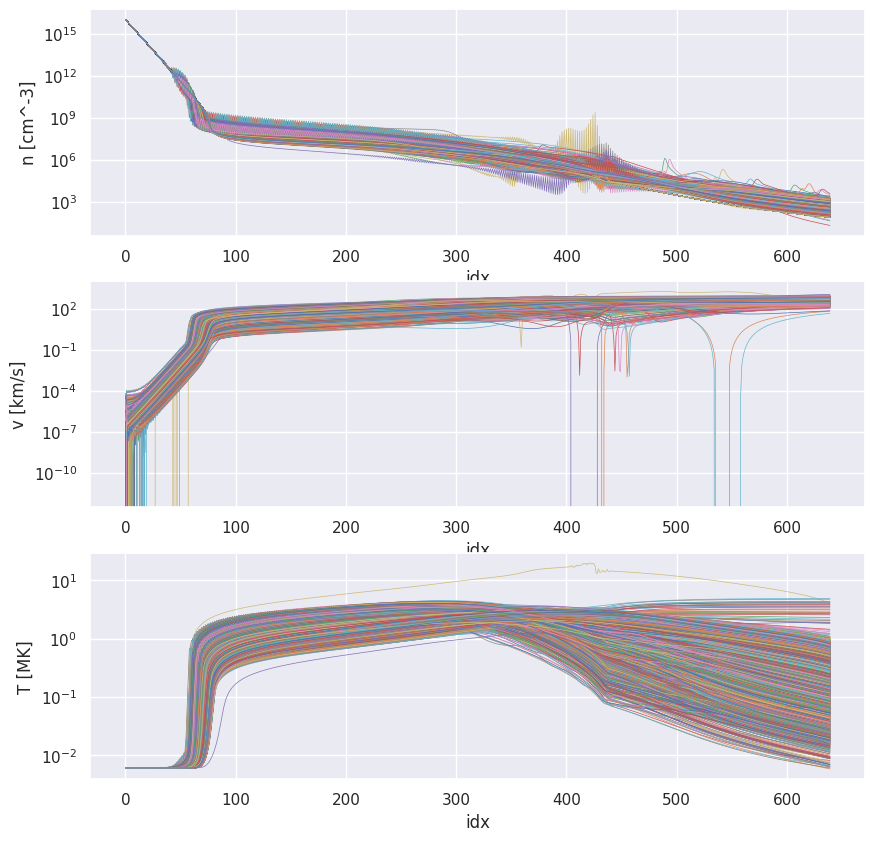

In [15]:
plot_file_data(real_files, ['n [cm^-3]', 'v [km/s]', 'T [MK]'])

# Input Data Analysis

In [16]:
inputs = pd.DataFrame(columns=['R [Rsun]', 'B [G]', 'alpha [deg]'])

for idx, f in enumerate(real_files):
    df = pd.read_csv(str(f),  skiprows=2, usecols=['R [Rsun]', 'B [G]', 'alpha [deg]'])

    inputs = pd.concat([inputs, df], ignore_index=True)
    sys.stdout.write('\033[K' + "file: " + str(idx) + " " + str(f) + '\r')
inputs.head()

,R [Rsun],B [G],alpha [deg]
0,1.000000,6.813160,-0.127607
1,1.000104,6.811385,-0.126912
2,1.000207,6.809607,-0.126205
3,1.000311,6.807825,-0.125486
4,1.000415,6.806039,-0.124753


In [17]:
inputs.describe()

,R [Rsun],B [G],alpha [deg]
count,7.533440e+06,7.533440e+06,7.533440e+06
mean,4.755423e+00,-5.362380e-01,1.885222e+00
std,7.164914e+00,9.194757e+01,1.472832e+01
min,1.000000e+00,-1.754111e+04,-8.763211e+01
25%,1.020572e+00,-2.144801e+00,-1.079501e-01
50%,1.151124e+00,7.419021e-04,0.000000e+00
75%,4.250278e+00,2.053882e+00,9.997013e-01
max,3.150140e+01,2.470956e+05,8.925744e+01


[Text(0.5, 0, 'R [Rsun]'), None, [Text(0, 0, '')]]

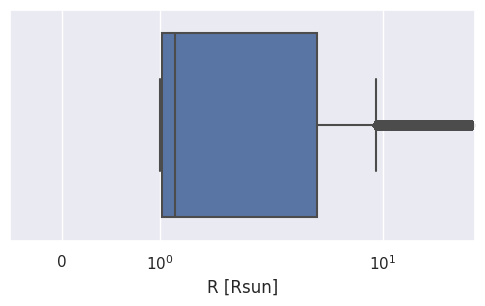

In [18]:
fig,ax = plt.subplots(figsize=(6,3))
bp = sns.boxplot(inputs['R [Rsun]'], orient='h', ax=ax)

bp.set(xlabel="R [Rsun]", xscale="symlog", yticklabels=[])
# ax.set_xscale("log")
# ax.set_label("R [Rsun]")


[Text(0.5, 0, 'B [G]'), None, [Text(0, 0, '')]]

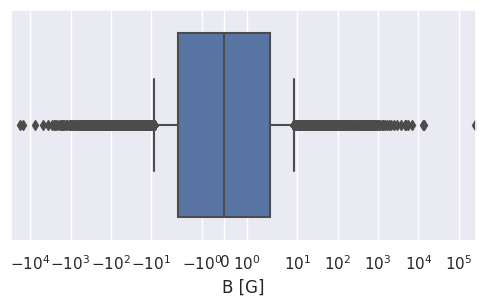

In [19]:
fig,ax = plt.subplots(figsize=(6,3))
bp = sns.boxplot(inputs['B [G]'], orient='h', ax=ax)

bp.set(xlabel='B [G]', xscale="symlog", yticklabels=[])

[Text(0.5, 0, 'alpha [deg]'), None, [Text(0, 0, '')]]

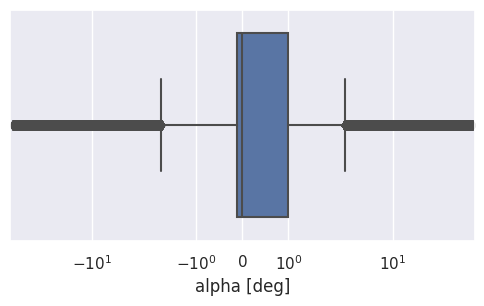

In [20]:
fig,ax = plt.subplots(figsize=(6,3))
bp = sns.boxplot(inputs['alpha [deg]'], orient='h', ax=ax)

bp.set(xlabel='alpha [deg]', xscale="symlog", yticklabels=[])

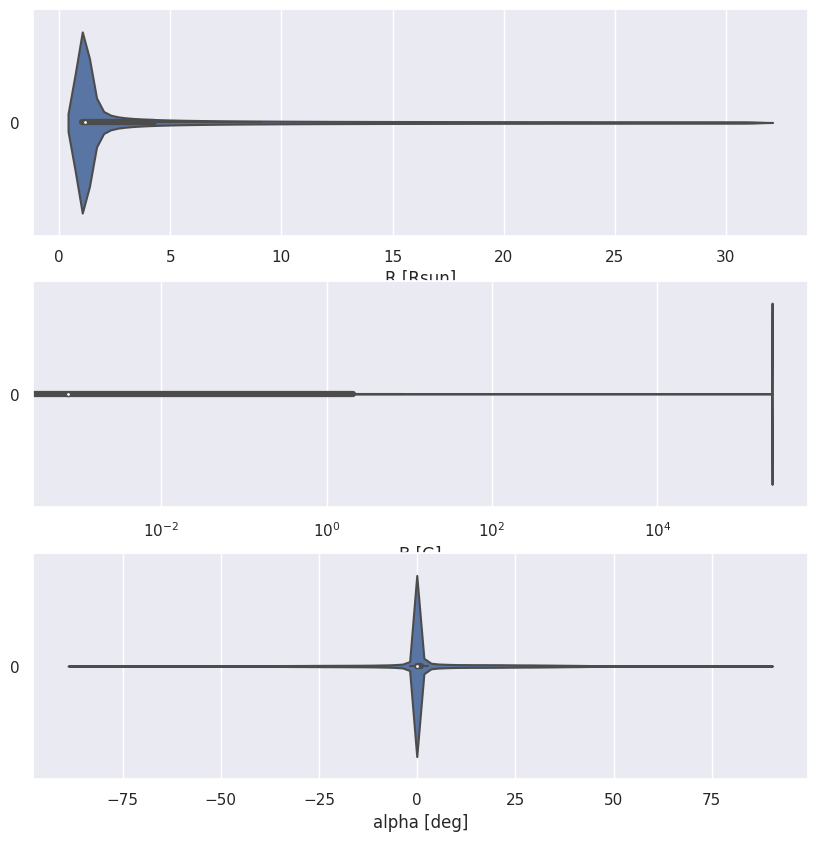

In [33]:
fig, axs = plt.subplots(3, 1, figsize=(10,10))
sns.violinplot(inputs['R [Rsun]'], ax=axs[0], orient='h')
sns.violinplot(inputs['B [G]'], ax=axs[1],orient='h')
sns.violinplot(inputs['alpha [deg]'], ax=axs[2],orient='h')

axs[0].set_xlabel('R [Rsun]')
axs[1].set_xlabel('B [G]')
axs[2].set_xlabel('alpha [deg]')


axs[1].set_xscale("log")
# for ax in axs:
#     ax.set_xscale("symlog")

<AxesSubplot: >

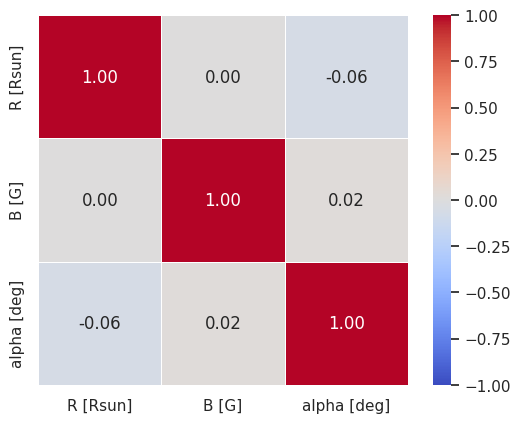

In [22]:
corr = inputs.corr()

fig, ax = plt.subplots()
sns.heatmap(corr, vmin=-1, vmax=1, center=0, square=True, xticklabels=True,
                                                yticklabels=True, figure=fig, ax=ax, annot=True, fmt='.2f',
                                                cmap='coolwarm', linewidths=.5)

# Output Variable Analysis

In [23]:
outputs = pd.DataFrame(columns=['n [cm^-3]', 'v [km/s]', 'T [MK]'])

df_list = [
    pd.read_csv(str(f),  skiprows=2, usecols=['n [cm^-3]', 'v [km/s]', 'T [MK]'])
    for f in real_files
]
outputs = pd.concat(df_list, ignore_index=True)
outputs.head()

,n [cm^-3],v [km/s],T [MK]
0,1.000375e+16,3.315413e-07,0.006
1,8.194385e+15,1.452716e-07,0.006
2,6.716319e+15,2.123098e-07,0.006
3,5.498820e+15,2.177507e-07,0.006
4,4.506467e+15,3.132986e-07,0.006


In [24]:
outputs.describe()

,n [cm^-3],v [km/s],T [MK]
count,7.533440e+06,7.533440e+06,7.533440e+06
mean,8.630207e+13,2.553245e+02,1.384148e+00
std,6.839549e+14,2.148545e+02,8.967666e-01
min,1.972793e+01,-6.756846e-03,5.764889e-03
25%,1.622396e+04,4.926307e+01,7.178972e-01
50%,2.350818e+06,2.110216e+02,1.337099e+00
75%,2.131588e+07,4.507698e+02,2.098447e+00
max,1.009917e+16,1.889365e+03,1.989729e+01


[Text(0.5, 0, 'n [cm^-3]'), None, [Text(0, 0, '')]]

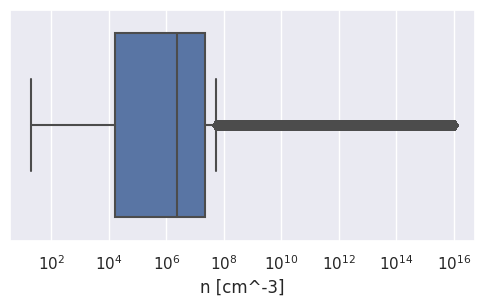

In [25]:
fig,ax = plt.subplots(figsize=(6,3))
bp = sns.boxplot(outputs['n [cm^-3]'], orient='h', ax=ax)

bp.set(xlabel='n [cm^-3]', xscale="log", yticklabels=[])

[Text(0.5, 0, 'v [km/s]'), None, [Text(0, 0, '')]]

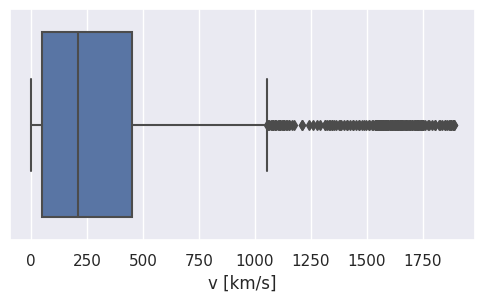

In [26]:
fig,ax = plt.subplots(figsize=(6,3))
bp = sns.boxplot(outputs['v [km/s]'], orient='h', ax=ax)

bp.set(xlabel='v [km/s]', xscale="linear", yticklabels=[])

[Text(0.5, 0, 'T [MK]'), None, [Text(0, 0, '')]]

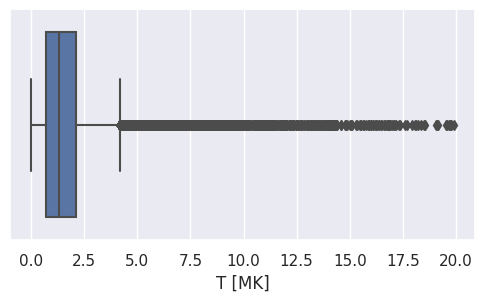

In [27]:
fig,ax = plt.subplots(figsize=(6,3))
bp = sns.boxplot(outputs['T [MK]'], orient='h', ax=ax)

bp.set(xlabel='T [MK]', xscale="linear", yticklabels=[])

Text(0.5, 0, 'T [MK]')

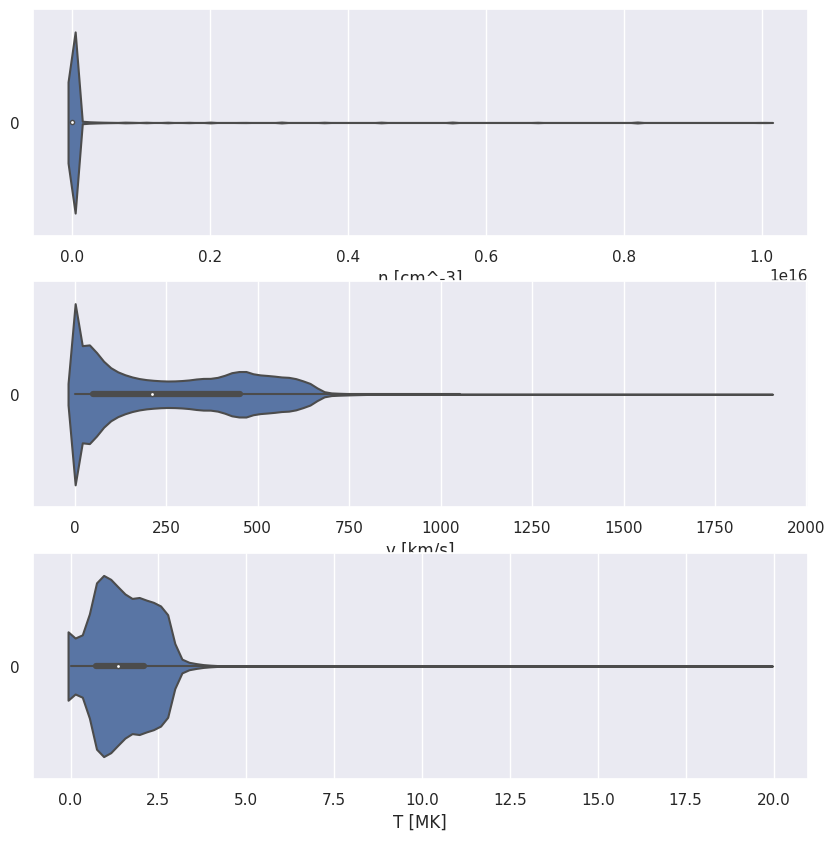

In [28]:
fig, axs = plt.subplots(3, 1, figsize=(10,10))
sns.violinplot(outputs['n [cm^-3]'], ax=axs[0], orient='h')
sns.violinplot(outputs['v [km/s]'], ax=axs[1], orient='h')
sns.violinplot(outputs['T [MK]'], ax=axs[2], orient='h')

axs[0].set_xlabel('n [cm^-3]')
axs[1].set_xlabel('v [km/s]')
axs[2].set_xlabel('T [MK]')

<AxesSubplot: >

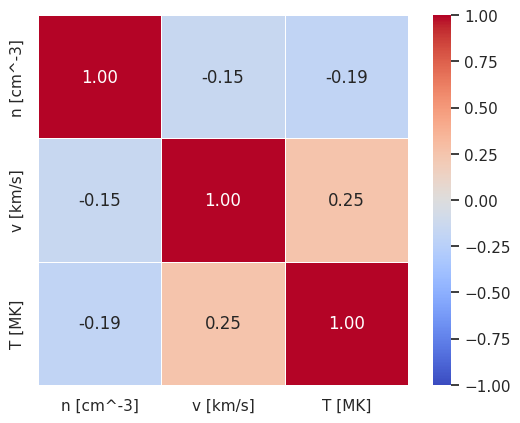

In [29]:
outputs = outputs.astype(np.float64)
corr = outputs.corr()

fig, ax = plt.subplots()
sns.heatmap(corr, vmin=-1, vmax=1, center=0, square=True, xticklabels=True,
                                                yticklabels=True, figure=fig, ax=ax, annot=True, fmt='.2f',
                                                cmap='coolwarm', linewidths=.5)

# Joint Analysis

In [30]:
full_df = pd.concat([inputs, outputs], axis=1)
full_df

,R [Rsun],B [G],alpha [deg],n [cm^-3],v [km/s],T [MK]
0,1.000000,6.813160,-0.127607,1.000375e+16,3.315413e-07,0.006000
1,1.000104,6.811385,-0.126912,8.194385e+15,1.452716e-07,0.006000
2,1.000207,6.809607,-0.126205,6.716319e+15,2.123098e-07,0.006000
3,1.000311,6.807825,-0.125486,5.498820e+15,2.177507e-07,0.006000
4,1.000415,6.806039,-0.124753,4.506467e+15,3.132986e-07,0.006000
...,...,...,...,...,...,...
7533435,30.434133,-0.001184,0.000000,2.306855e+02,6.425001e+02,0.853518
7533436,30.695671,-0.001164,0.000000,2.278465e+02,6.430370e+02,0.844196
7533437,30.957904,-0.001144,0.000000,2.225775e+02,6.435724e+02,0.834600
7533438,31.220819,-0.001125,0.000000,2.198836e+02,6.441066e+02,0.824983


In [31]:

# pp = sns.pairplot(full_df, x_vars=['R [Rsun]', 'B [G]', 'alpha [deg]'], y_vars=['n [cm^-3]', 'v [km/s]', 'T [MK]'])
# for ax in pp.axes.flat:
#     ax.set_xscale("log")
    # if ax.get_label() in ['n [cm^-3]', 'v [km/s]', 'T [MK]']:
    #     ax.set_yscale("symlog")

detetar e tirar o outlier de v e T

<AxesSubplot: >

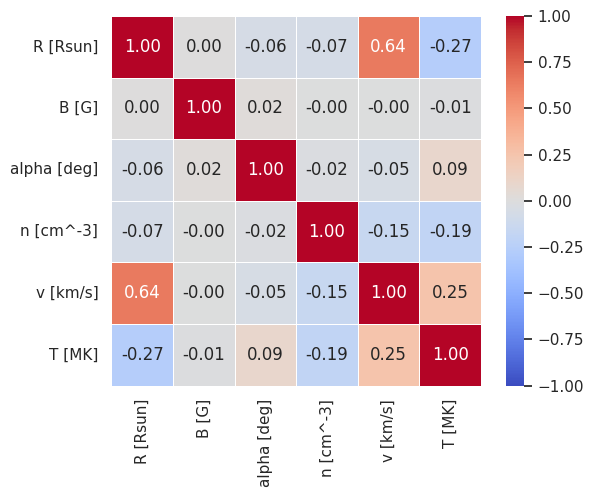

In [34]:
corr = full_df.corr()
fig, ax = plt.subplots()
sns.heatmap(corr, vmin=-1, vmax=1, center=0, square=True, xticklabels=True,
                                                yticklabels=True, figure=fig, ax=ax, annot=True, fmt='.2f',
                                                cmap='coolwarm', linewidths=.5)